In [1]:
from sklearn.manifold import TSNE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('./train.csv')
print(d0 )# print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11         9       0       0       0    

In [4]:
sample_data=d.head(10000)
sample_label=l.head(10000)

In [14]:
idx=1

In [22]:
val = d[iloc[idx]]

NameError: name 'iloc' is not defined

In [23]:
print(val)
print(type(val))

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 784, dtype: int64
<class 'pandas.core.series.Series'>


In [24]:
vlaues = val.values

In [26]:
type(vlaues)

numpy.ndarray

In [27]:
img=vlaues.reshape(28,28)

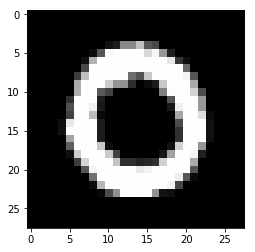

In [31]:
plt.imshow(img,cmap='gray')

In [33]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(sample_data)
print(std_data.shape)

c:\users\trusha\python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(10000, 784)


c:\users\trusha\python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [35]:
type(std_data)

numpy.ndarray

In [37]:
#we take standard data with menan=0 and std_dev = 1 
data_5000 = std_data[:5000,:]
label_5000 = sample_label[:5000]

In [38]:
#define the model
model = TSNE(n_components=2, random_state = 0)
#no of comaponents= 2
#default perplexity = 30
#default iternations = 1000
#default learning rate = 200

In [39]:
tsne_data = model.fit_transform(data_5000)

In [43]:
tsne_data.T.shape

(2, 5000)

In [44]:
tsne_data.T

array([[-26.180357 , -23.851913 ,   4.2212253, ...,  13.336061 ,
         49.133404 ,  41.977623 ],
       [ 52.92299  , -58.525105 ,  26.289248 , ...,  55.267487 ,
         28.18892  ,  31.360588 ]], dtype=float32)

In [50]:
label_5000.shape == label_5000.T.shape


True

In [53]:
tsne_data=np.vstack((tsne_data.T,label_5000)).T

In [54]:
tsne_df = pd.DataFrame(tsne_data,columns=('dim1','dim2','labels'))

In [55]:
tsne_df.head

<bound method NDFrame.head of            dim1       dim2  labels
0    -26.180357  52.922989     1.0
1    -23.851913 -58.525105     0.0
2      4.221225  26.289248     1.0
3     40.728058 -29.719421     4.0
4    -26.638824 -67.527161     0.0
5    -26.945805 -41.345009     0.0
6     67.255051   6.236747     7.0
7     15.699081 -36.402889     3.0
8      8.509782 -25.567787     5.0
9     -8.574962 -36.473957     3.0
10     1.467572  13.402019     8.0
11    41.610153  31.633120     9.0
12    -1.565907  33.443195     1.0
13    17.254148 -48.178955     3.0
14   -13.678073 -32.268520     3.0
15     1.509113  42.009338     1.0
16   -20.160643 -11.593720     2.0
17   -41.003040 -46.896286     0.0
18    59.643581  28.312160     7.0
19     3.721465 -46.287235     5.0
20    -9.218549  10.828823     8.0
21   -46.023087  27.162695     6.0
22   -18.752197 -11.404763     2.0
23   -25.008497 -68.702644     0.0
24    20.511843 -12.090528     2.0
25    -8.029113 -25.546301     3.0
26   -74.750748  -4.52702

c:\users\trusha\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


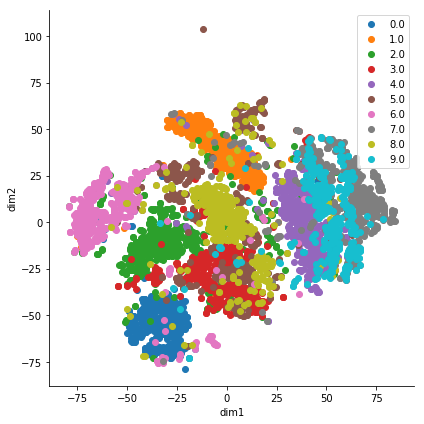

In [71]:
import seaborn as sns
sns.FacetGrid(tsne_df, hue='labels',size= 6).map(plt.scatter,'dim1','dim2')
plt.legend()

In [67]:
dim1=tsne_df.dim1.values

In [68]:
dim2=tsne_df.dim2.values

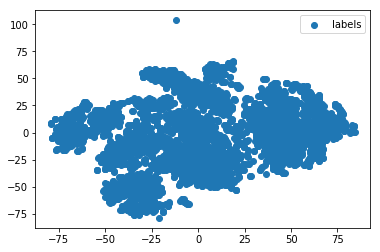

In [74]:
plt.scatter(dim1,dim2,label='labels')
plt.legend()

# with change in perplexity

In [75]:
model = TSNE(n_components=2,perplexity=50)
tsne_d = model.fit_transform(data_5000)

In [76]:
tsne_d = np.vstack((tsne_d.T,label_5000)).T
tsne_df = pd.DataFrame(tsne_d,columns = ('dim1','dim2','label'))

c:\users\trusha\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


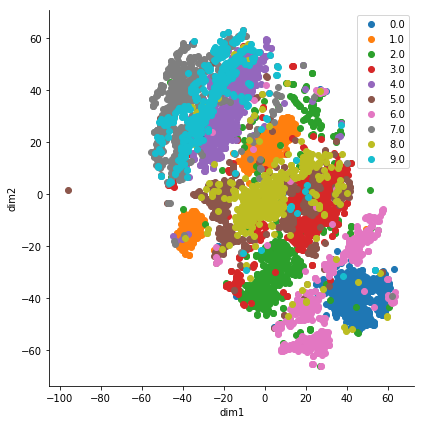

In [79]:
sns.FacetGrid(tsne_df, hue='label',size= 6).map(plt.scatter,'dim1','dim2')
plt.legend()

In [81]:
samp_15000 = d.head(15000)

In [82]:
sampl_l = l.head(15000)

In [84]:
std_data = StandardScaler().fit_transform(samp_15000)
print(std_data.shape)

c:\users\trusha\python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(15000, 784)


c:\users\trusha\python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [85]:
tsne_data=model.fit_transform(std_data)

In [86]:
tsne_data = np.vstack((tsne_data.T,sampl_l)).T
df= pd.DataFrame(tsne_d,columns = ('dim1','dim2','label'))


c:\users\trusha\python\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


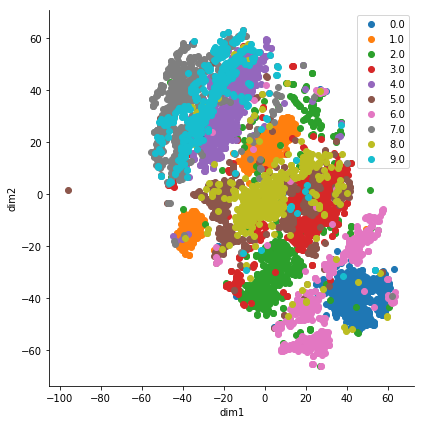

In [87]:
sns.FacetGrid(tsne_df, hue='label',size= 6).map(plt.scatter,'dim1','dim2')
plt.legend()